### Summary 
- Sampling Distribution 
- Colormaps

In [297]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [275]:
%matplotlib notebook

#### Example of plotting sampling distribution

In [276]:
np.random.seed(123)
s = np.random.normal(100,250, 1000)

<IPython.core.display.Javascript object>


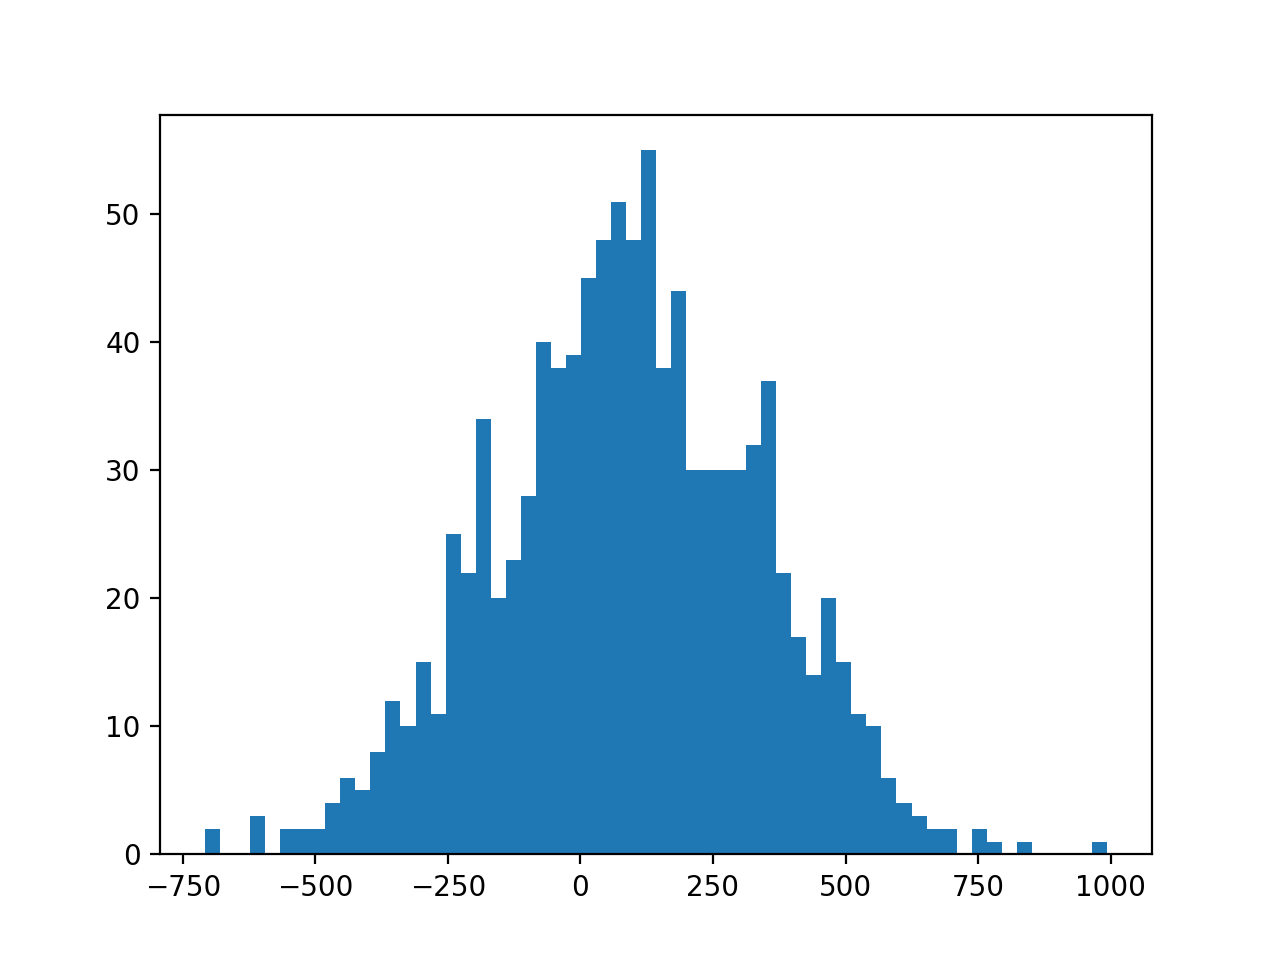

In [277]:
plt.figure()
_ = plt.hist(s,bins= 60)

In [ ]:
# Draw bootstrapped samples from s , 1000 of them, find mean and see distribution 

In [625]:
means = []
for i in range(10000):
    s_1 = np.random.choice(s,size= 1000, replace = True)
    means.append(np.mean(s_1))

In [626]:
x = np.array(means)

<IPython.core.display.Javascript object>


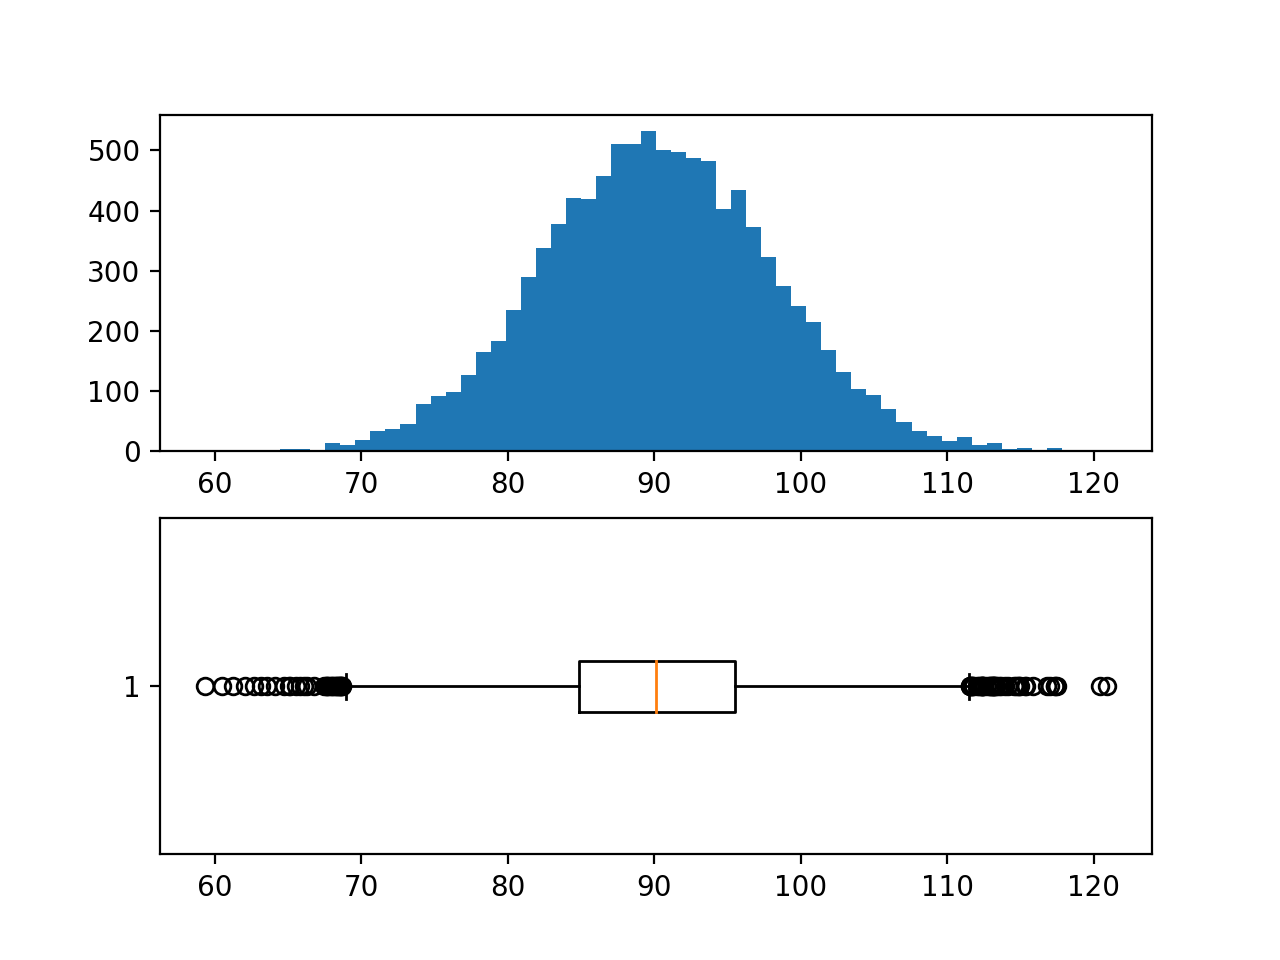

In [631]:
fig, ax = plt.subplots(ncols= 1,nrows= 2)
_ = ax[0].hist(x, bins = 60)
_ = ax[1].boxplot(x,vert = False)

### Using colormaps 

Using colors to display variation in continuous quantities can make for effective visualization, as was 
seen in case of 2d histograms. Matplotlib has in built colormaps useful to show this variation 
doumented here - https://matplotlib.org/tutorials/colors/colormaps.html

##### Getting a inbuilt colormap and accessing the rgba vectors that make up a color

In [605]:
# From 'jet' colormap, get 10 vectors
clrs = plt.get_cmap(name= 'jet', lut= 10)

print(clrs(8))
print(clrs(9))
print(clrs(10))

(1.0, 0.078189300411522389, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


<IPython.core.display.Javascript object>


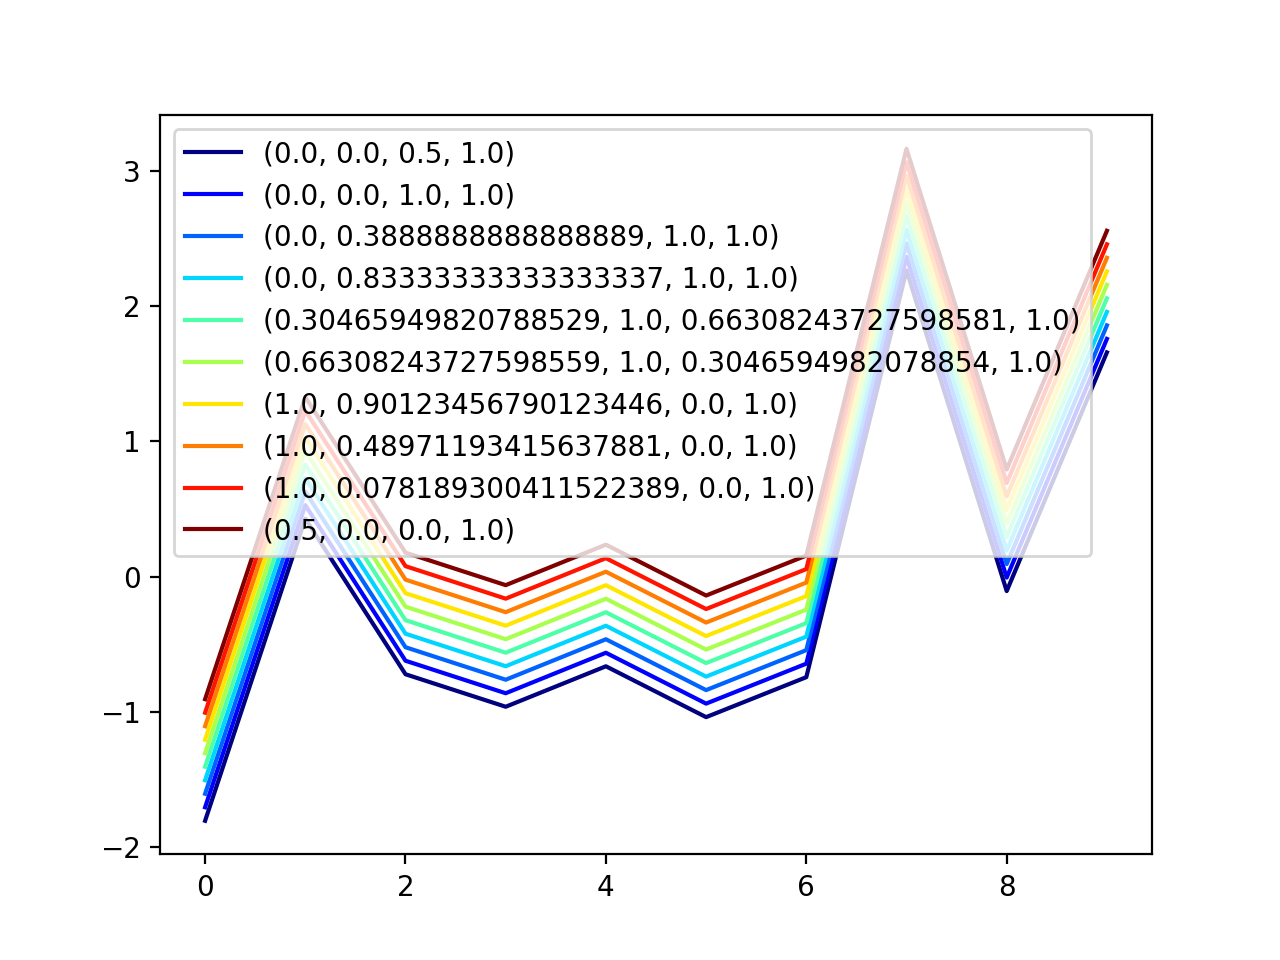

(0.0, 0.0, 0.5, 1.0)
(0.0, 0.0, 1.0, 1.0)
(0.0, 0.3888888888888889, 1.0, 1.0)
(0.0, 0.83333333333333337, 1.0, 1.0)
(0.30465949820788529, 1.0, 0.66308243727598581, 1.0)
(0.66308243727598559, 1.0, 0.3046594982078854, 1.0)
(1.0, 0.90123456790123446, 0.0, 1.0)
(1.0, 0.48971193415637881, 0.0, 1.0)
(1.0, 0.078189300411522389, 0.0, 1.0)
(0.5, 0.0, 0.0, 1.0)


In [603]:
x = np.random.normal(size = 10)
plt.figure()
for i in range(10):
    print(clrs(i))
    plt.plot(x + 0.1*i , c = clrs(i), label = str(clrs(i)))
plt.legend(loc = 'best')    

##### Colormaps are pre built list of color vectors, each  of length 4 . The list is usually of 256 vectors.Sometimes we may want map this index
##### to a different sequence, classes Normalize & ScalarMappable allow to do that

In [608]:
cmap = plt.get_cmap(name= 'jet')
norm = mpl.colors.Normalize(vmin= 0,  vmax= 1) # Normalize object
mapping = plt.cm.ScalarMappable(norm= norm, cmap= cmap) # takes norm object, and a cmap object

##### To create a  linearly segmented mapping, ScalarMappable class divides the interval using a step size 0.01 
##### So, a new color map of length (vmax-vmin)*100 + 1 is created
To demonstrate, we create a similar list of keys to access the map created

In [613]:
new_ind = np.linspace(0,1,101)
new_ind

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

<IPython.core.display.Javascript object>


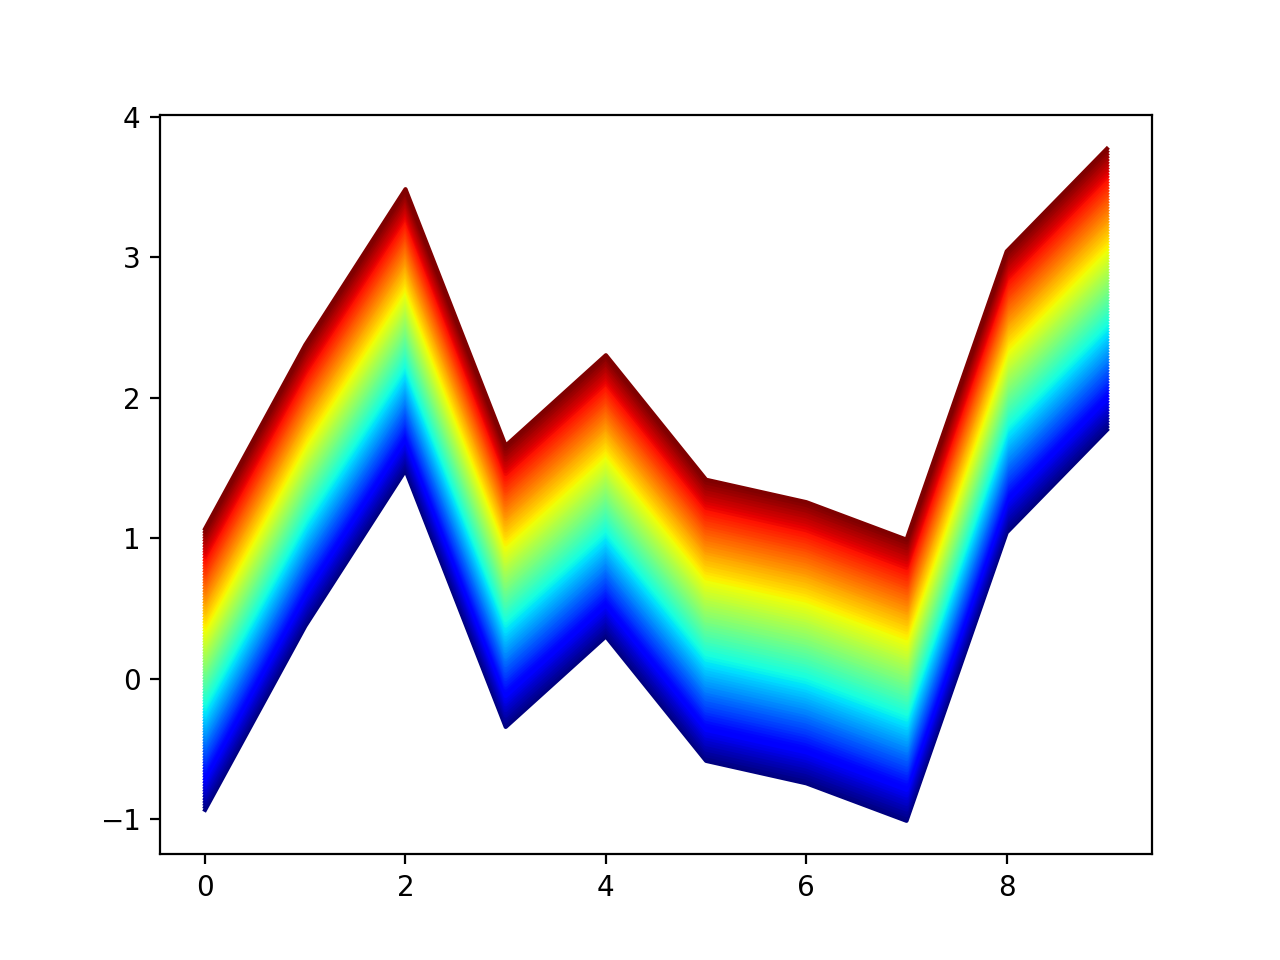

0.0 (0.0, 0.0, 0.5, 1.0)
0.01 (0.0, 0.0, 0.535650623885918, 1.0)
0.02 (0.0, 0.0, 0.589126559714795, 1.0)
0.03 (0.0, 0.0, 0.62477718360071299, 1.0)
0.04 (0.0, 0.0, 0.67825311942958999, 1.0)
0.05 (0.0, 0.0, 0.71390374331550799, 1.0)
0.06 (0.0, 0.0, 0.76737967914438499, 1.0)
0.07 (0.0, 0.0, 0.80303030303030298, 1.0)
0.08 (0.0, 0.0, 0.85650623885917998, 1.0)
0.09 (0.0, 0.0, 0.90998217468805698, 1.0)
0.1 (0.0, 0.0, 0.94563279857397498, 1.0)
0.11 (0.0, 0.0, 0.99910873440285197, 1.0)
0.12 (0.0, 0.0, 1.0, 1.0)
0.13 (0.0, 0.0176470588235293, 1.0, 1.0)
0.14 (0.0, 0.049019607843137254, 1.0, 1.0)
0.15 (0.0, 0.096078431372549025, 1.0, 1.0)
0.16 (0.0, 0.12745098039215685, 1.0, 1.0)
0.17 (0.0, 0.17450980392156862, 1.0, 1.0)
0.18 (0.0, 0.22156862745098038, 1.0, 1.0)
0.19 (0.0, 0.25294117647058822, 1.0, 1.0)
0.2 (0.0, 0.29999999999999999, 1.0, 1.0)
0.21 (0.0, 0.33137254901960772, 1.0, 1.0)
0.22 (0.0, 0.3784313725490196, 1.0, 1.0)
0.23 (0.0, 0.40980392156862744, 1.0, 1.0)
0.24 (0.0, 0.45686274509803909,

In [614]:
x = np.random.normal(size = 10)
plt.figure()
for i in new_ind:
    print(i, mapping.to_rgba(i))
    plt.plot(x + 2*i , c = mapping.to_rgba(i))

In [616]:
cmap = plt.get_cmap(name= 'jet')
norm = mpl.colors.Normalize(vmin= 0,  vmax= 2) # Normalize object
mapping = plt.cm.ScalarMappable(norm= norm, cmap= cmap) # takes norm object, and a cmap object

In [618]:
new_ind = np.linspace(0,2,201)
new_ind

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,
        1.08,  1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,
        1.17,  1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,
        1.26,  1.27,

<IPython.core.display.Javascript object>


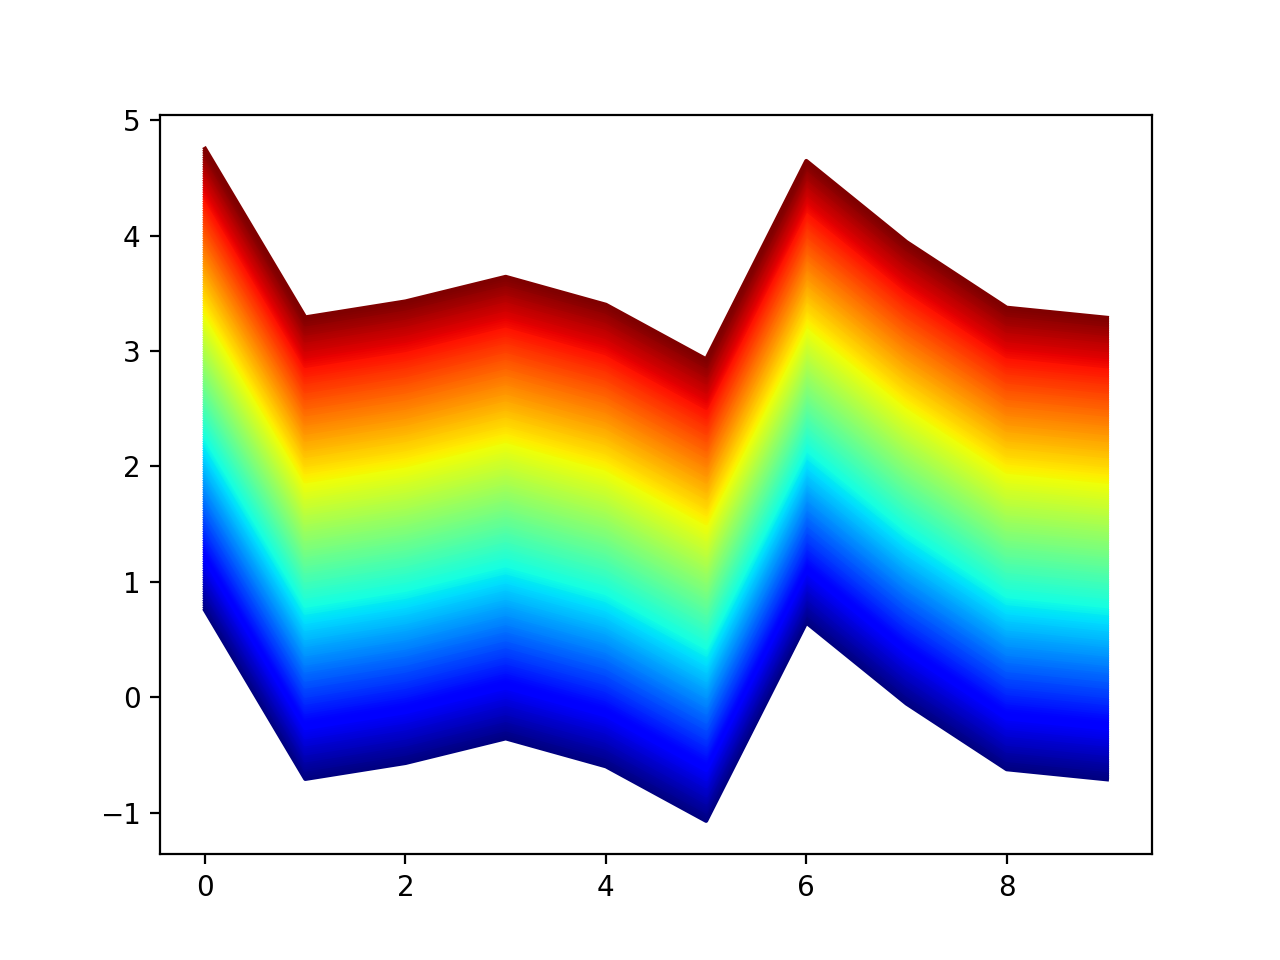

0.0 (0.0, 0.0, 0.5, 1.0)
0.01 (0.0, 0.0, 0.517825311942959, 1.0)
0.02 (0.0, 0.0, 0.535650623885918, 1.0)
0.03 (0.0, 0.0, 0.553475935828877, 1.0)
0.04 (0.0, 0.0, 0.589126559714795, 1.0)
0.05 (0.0, 0.0, 0.60695187165775399, 1.0)
0.06 (0.0, 0.0, 0.62477718360071299, 1.0)
0.07 (0.0, 0.0, 0.64260249554367199, 1.0)
0.08 (0.0, 0.0, 0.67825311942958999, 1.0)
0.09 (0.0, 0.0, 0.69607843137254899, 1.0)
0.1 (0.0, 0.0, 0.71390374331550799, 1.0)
0.11 (0.0, 0.0, 0.74955436720142599, 1.0)
0.12 (0.0, 0.0, 0.76737967914438499, 1.0)
0.13 (0.0, 0.0, 0.78520499108734398, 1.0)
0.14 (0.0, 0.0, 0.80303030303030298, 1.0)
0.15 (0.0, 0.0, 0.83868092691622098, 1.0)
0.16 (0.0, 0.0, 0.85650623885917998, 1.0)
0.17 (0.0, 0.0, 0.87433155080213898, 1.0)
0.18 (0.0, 0.0, 0.90998217468805698, 1.0)
0.19 (0.0, 0.0, 0.92780748663101598, 1.0)
0.2 (0.0, 0.0, 0.94563279857397498, 1.0)
0.21 (0.0, 0.0, 0.96345811051693397, 1.0)
0.22 (0.0, 0.0, 0.99910873440285197, 1.0)
0.23 (0.0, 0.0, 1.0, 1.0)
0.24 (0.0, 0.0, 1.0, 1.0)
0.25 (0.0

In [619]:
x = np.random.normal(size = 10)
plt.figure()
for i in new_ind:
    print(i, mapping.to_rgba(i))
    plt.plot(x + 2*i , c = mapping.to_rgba(i))

In [623]:
mapping.to_rgba(0.016)

(0.0, 0.0, 0.535650623885918, 1.0)

#### Creating a colorbar 

<IPython.core.display.Javascript object>


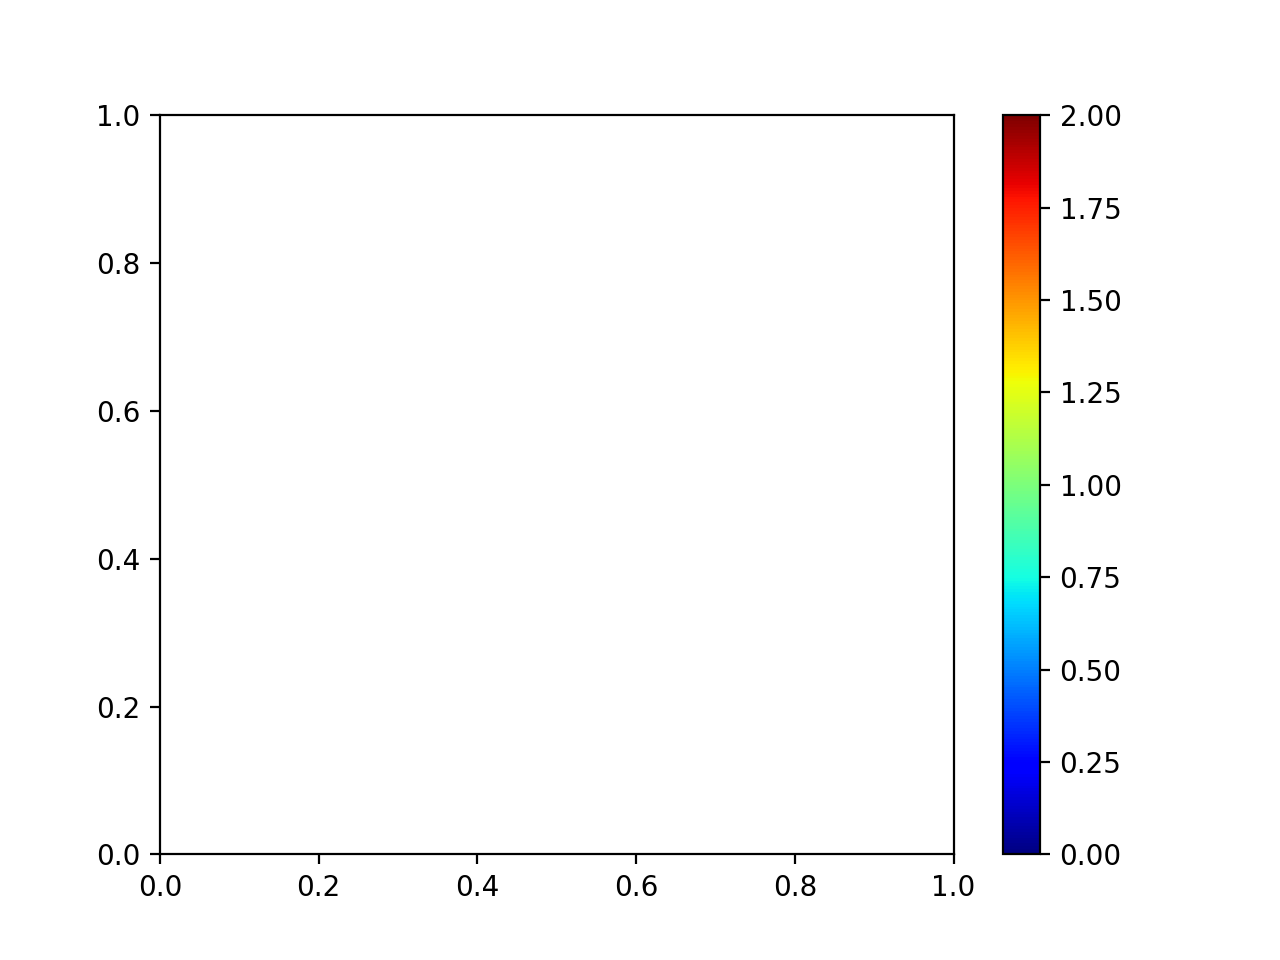

In [635]:
mapping.set_array([])
plt.figure()
plt.colorbar(mappable= mapping)

# Assignment 

In [281]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
#df

In [282]:
summary = df.T.describe()

In [283]:
means = summary.loc['mean',:]
#sd = summary.loc['std',:]

In [284]:
from scipy import stats
#means = [32000, 43000, 43500, 48000]
pop_sd = [200000, 100000, 140000, 70000]
sampling_sd = [el/np.sqrt(3650) for el in pop_sd]

In [285]:
ubs = stats.norm.ppf(q= 0.975, loc = means, scale = sampling_sd)
lbs = stats.norm.ppf(q= 0.025, loc = means, scale = sampling_sd)
err= [x-y for x,y in zip(ubs,lbs)]

<IPython.core.display.Javascript object>


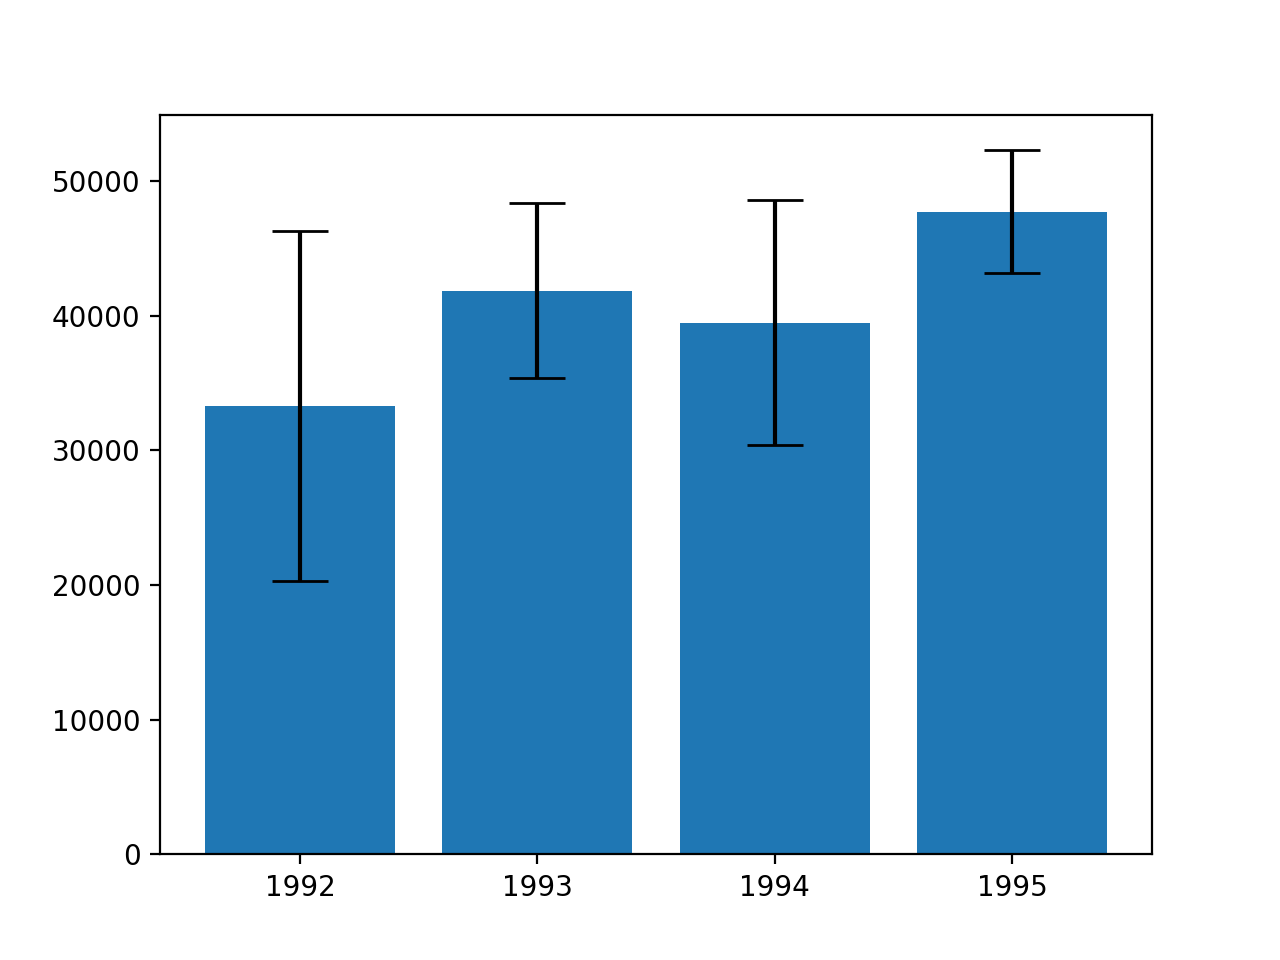

In [286]:
plt.figure()
labels = [str(x) for x in df.index.values]
ats = plt.bar(x = labels, height = means, yerr = err, capsize = 10 )

In [118]:
def get_child(art, depth):
        for child in art.get_children():
            print('--' * depth, child)
            #print('--')
            get_child(child, depth + 1)

In [120]:
get_child(ats, depth =0)

 Rectangle(xy=(-0.4, 0), width=0.8, height=33312.1, angle=0)
 Rectangle(xy=(0.6, 0), width=0.8, height=41861.9, angle=0)
 Rectangle(xy=(1.6, 0), width=0.8, height=39493.3, angle=0)
 Rectangle(xy=(2.6, 0), width=0.8, height=47743.6, angle=0)


### Above chart depicts, sample means in form of graph and a 95% intervals where we can find Population mean. We want to convey now, how likely is a new y axis value to be the population mean for each of the samples

- Function to compute one side probability from each of the sample means 
- Function to change color of bars using these probability values 
- Function to take user input from a click, and change colors

In [264]:
def get_probs(x, sample_mean, sampling_sd):
    """Function to compute one side probability from each of the sample means,
    then return double sides probability
    """
    probs = []
    for mean,sd in zip(sample_mean, sampling_sd):
        #print(mean,sd)
        if(x>=mean):
            prob = stats.norm.cdf(x, loc = mean, scale = sd) - 0.5
        else:
            prob = 0.5 - stats.norm.cdf(x, loc = mean, scale = sd)
        probs.append(1 - 2*prob)
    return probs    

In [265]:
def set_clrs(bar_container, probs):
    """Function to change color of bars using probability values, 
    probability values can be mapped to a sequential colormap in matplotlib
    """
    from matplotlib import cm
    #probs_round = [np.round(x,5) for x in probs]
    probs_round = probs
    colors = cm.viridis(probs_round)
    objs = bar_container.patches
    for i,obj in enumerate(objs):
        if(isinstance(obj, matplotlib.patches.Rectangle)):
            obj.set_color(colors[i])
        else:
            'Check if object is of types patches.Recatangle '
    plt.colorbar()        

In [420]:
plt.imshow?

In [401]:
sampling_sd

[3310.4235544094718,
 1655.2117772047359,
 2317.2964880866302,
 1158.6482440433151]

In [452]:
plt.get_cmap?

<IPython.core.display.Javascript object>


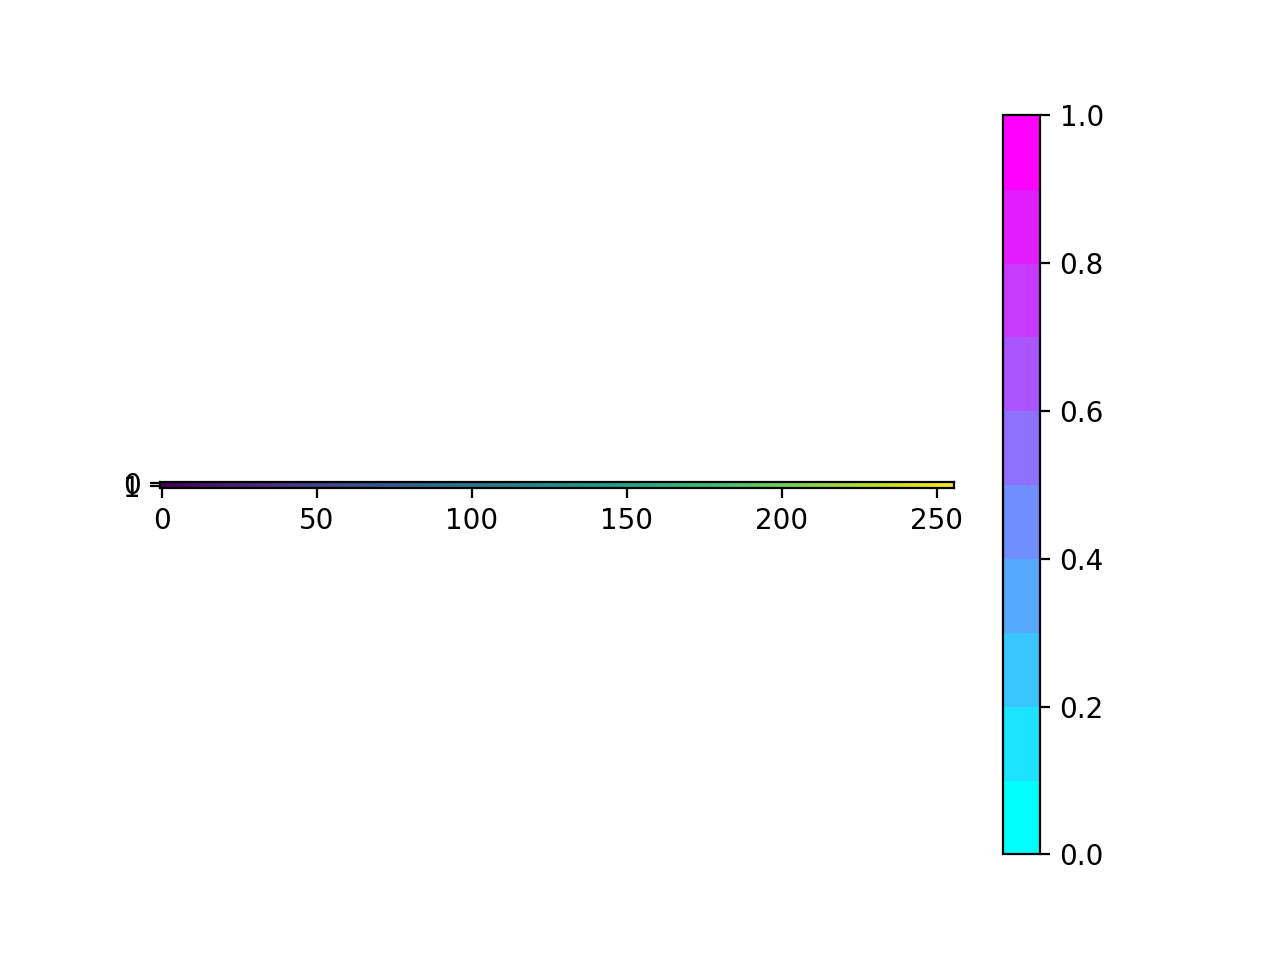

In [383]:

plt.figure()
plt.colorbar(mappable= mapping)

In [356]:
plt.colorbar?

In [438]:
cmap = plt.get_cmap(name= 'viridis')

In [442]:
cmap.colors?

In [443]:
plt.imshow?

<IPython.core.display.Javascript object>


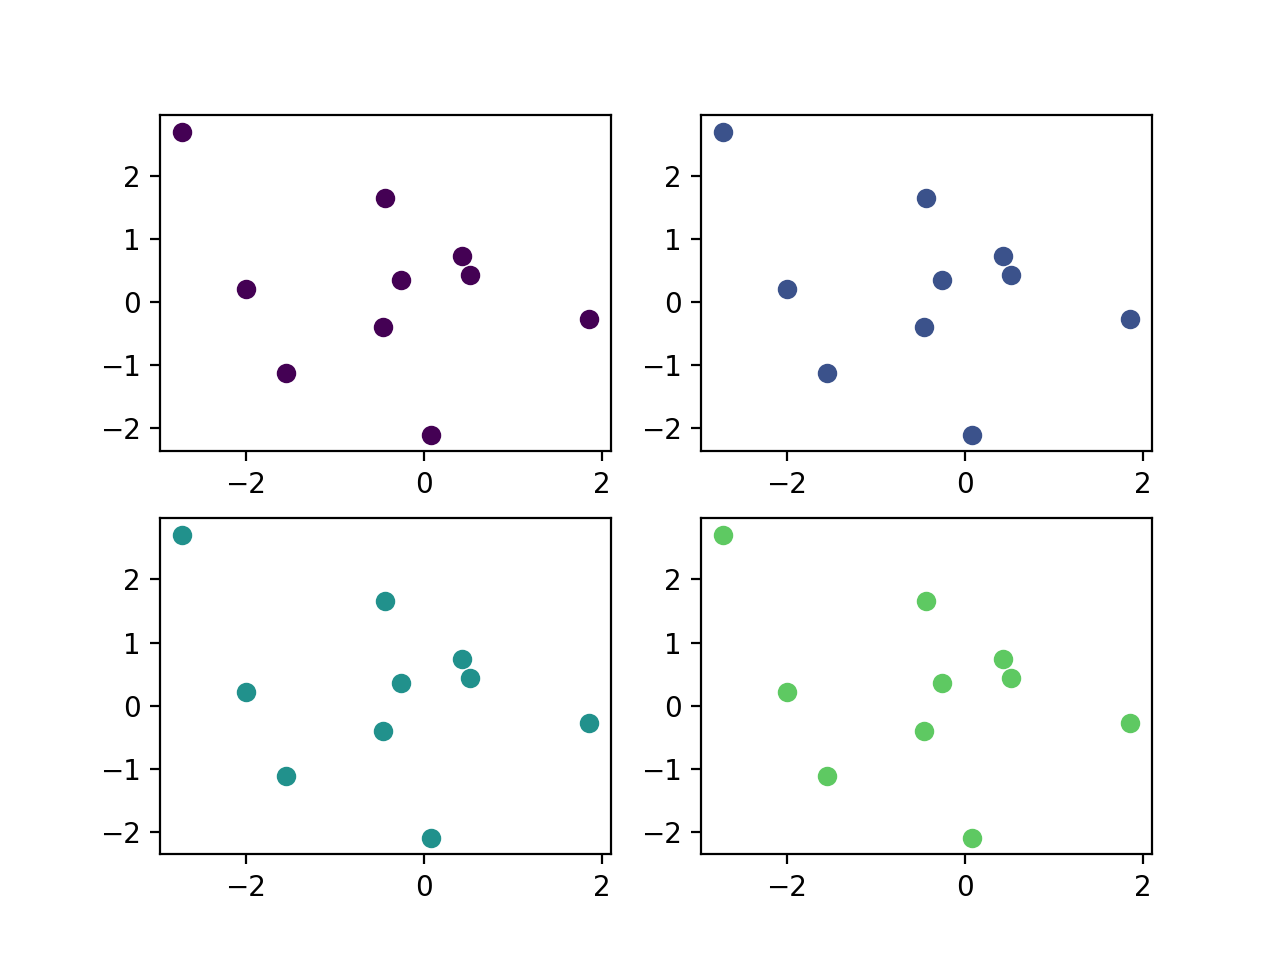

In [337]:
x = np.random.normal(size =10)
y = np.random.normal(size = 10)
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(x,y, c = cmap.colors[0])
ax[0,1].scatter(x,y,c = cmap.colors[1])
ax[1,0].scatter(x,y,c = cmap.colors[2])
ax[1,1].scatter(x,y,c = cmap.colors[3])

In [330]:
plt.scatter?

In [324]:
for i in range(10):
    print(cmap.colors[i+1] - cmap.colors[i])

[ 0.01389   0.074033  0.072914  0.      ]
[ 0.001396  0.067005  0.059181  0.      ]
[-0.011695  0.068157  0.045542  0.      ]
[-0.02017   0.060221  0.026051  0.      ]
[-0.0265    0.060704  0.01495   0.      ]
[-0.024495  0.052613  0.006589  0.      ]
[-0.023589  0.053683  0.003043  0.      ]
[-0.019571  0.048334  0.000251  0.      ]
[-0.019862  0.051549 -0.003453  0.      ]
[-0.014577  0.047882 -0.00886   0.      ]


In [300]:
norm = mpl.colors.Normalize(vmin= 0 ,vmax= 2)

In [303]:
cmap = plt.cm.ScalarMappable(norm= norm, cmap= 'viridis')

In [312]:
cmap.set_array([])

In [313]:
cmap.get_array()

[]

In [293]:
x = plt.get_cmap('viridis')

In [296]:
d = np.arange(0,256)
for i in range(256):
    plt.figure()

256

In [291]:
plt.cm.ScalarMappable?

In [270]:
plt.colorbar?

In [266]:
probs = get_probs(x= 39540, sample_mean= means,sampling_sd= sampling_sd)

In [267]:
probs

[0.059931421178177846,
 0.16068937947602235,
 0.98392318579505855,
 1.4386269953092778e-12]

In [268]:
set_clrs(ats, probs)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

In [243]:
from matplotlib import cm

In [166]:
new = [tuple(x) for x in cm.viridis(X= np.arange(0,1,0.1))]

In [167]:
new

[(0.26700400000000002, 0.0048739999999999999, 0.32941500000000001, 1.0),
 (0.28262300000000001, 0.140926, 0.45751700000000001, 1.0),
 (0.25393500000000002, 0.26525399999999999, 0.52998299999999998, 1.0),
 (0.206756, 0.37175799999999998, 0.55311699999999997, 1.0),
 (0.16362499999999999, 0.47113300000000002, 0.55814799999999998, 1.0),
 (0.12756799999999999, 0.56694900000000004, 0.55055600000000005, 1.0),
 (0.13469200000000001, 0.658636, 0.51764900000000003, 1.0),
 (0.26694099999999998, 0.74875100000000006, 0.44057299999999999, 1.0),
 (0.47750399999999998, 0.82144399999999995, 0.31819500000000001, 1.0),
 (0.74138800000000005, 0.87344900000000003, 0.149561, 1.0)]